<a href="https://colab.research.google.com/github/JorgeDuarte1509/Actividades_Aprendizaje-/blob/main/Avance1_19_Semana4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

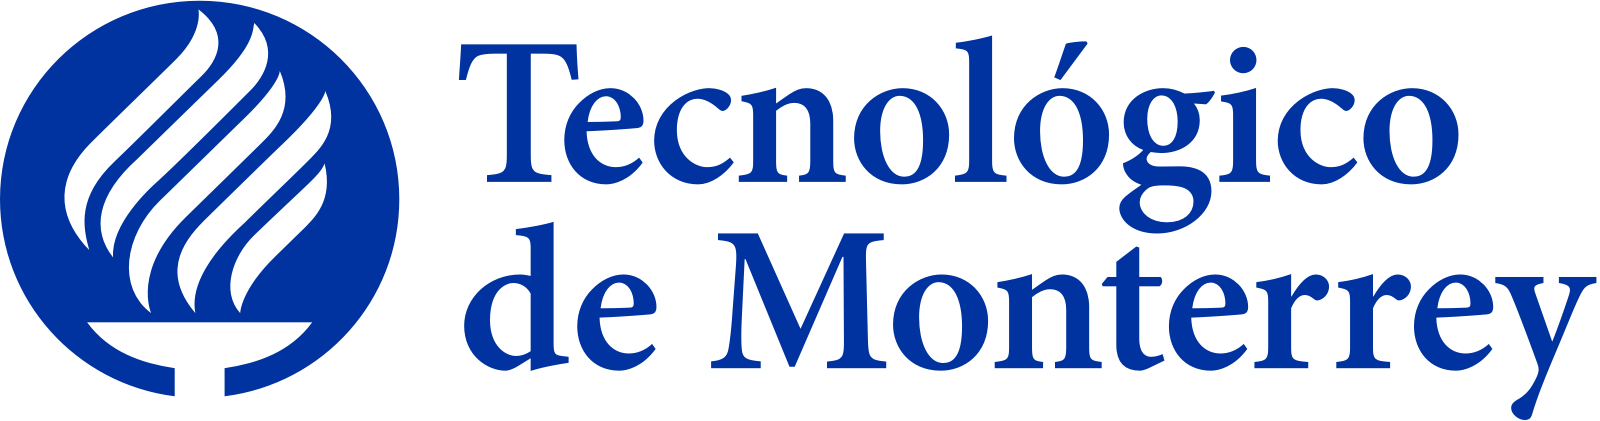

# Maestría en Inteligencia Artificial Aplicada
## TC 5035 Proyecto Integrador
### Tecnológico de Monterrey
### Dra. Grettel Barceló Alonso
### Dr. Luis Eduardo Falcón Morales
### Dr. Jose Antonio Cantoral Ceballos

## Equipo 19
Integrantes

> - Andrea Carolina Treviño Garza A01034993
> - Jorge Alberto Duarte Salinas  A01793015
> - Manuel Gerardo Licera Aguirre A00947315


## Contextualización de datos:

Previo a comenzar con el análisis exploratorio de los datos, comentaremos nuevamente un poco sobre el contexto del proyecto. Nuestro proyecto esta enfocado en buscar mejorar la utilización de las materias primas, en nuestro caso tubos rectangulares, del proceso de fabricación y corte en máquinas sierra en la empresa John Deere México.

Cuando nos referimos a materias primas estamos hablando de tubos con una longitud muy larga la cual después de que se recibe en el almacén se procesa para generar diferentes numeros de piezas que se utilizan para productos diferentes, la planta a la que esta enfocado este proyecto es para la planta que fabrica implementos para la maquinaría agrícola. Los implementos son los sistemas que se agregan al tractor para hacer alguna determinada función, puede ser un sistema de siembra por ejemplo.
Para tener una representación visual sobre los tubos que se utilizan como materia prima se agrega una imagen a continuación:

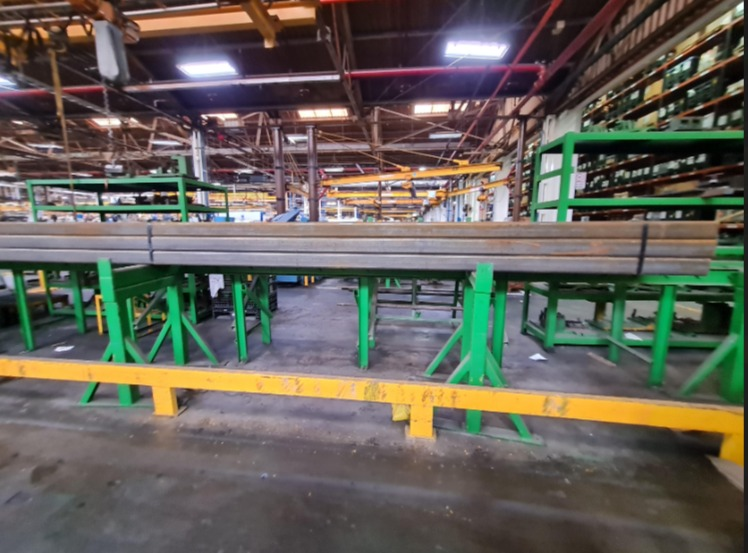

La materia prima pasa por el proceso de una máquina de corte Sierra Banda y a como está actualmente se corta la misma pieza hasta que se cumpla con la demanda requerida, esto puede generar que se pierda cantidad de materia prima ya que no todos los números de parte son divisibles al cien por ciento de la longitud de materia prima. Lo que queremos es poder crear un mezcla en base a las demandas diarias con las que tengamos el mejor aprovechamiento del material. A continuación se muestra una ejemplo de la máquina de corte y el contenedor donde se va colocando los tubos ya cortados.


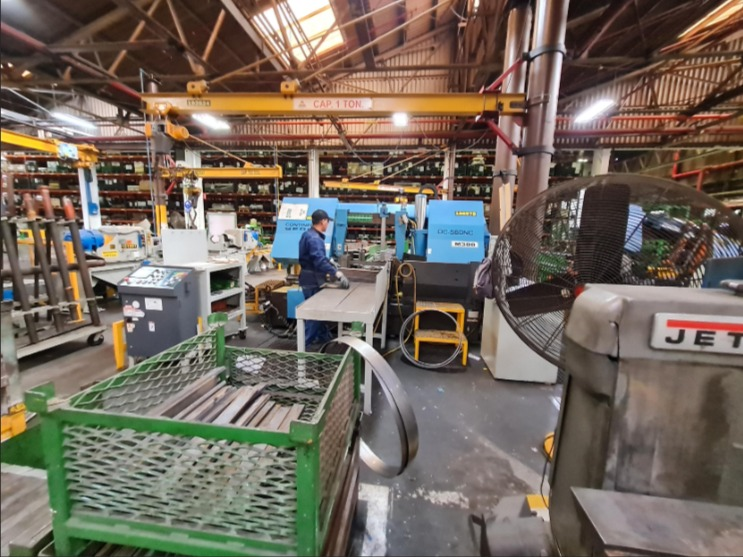


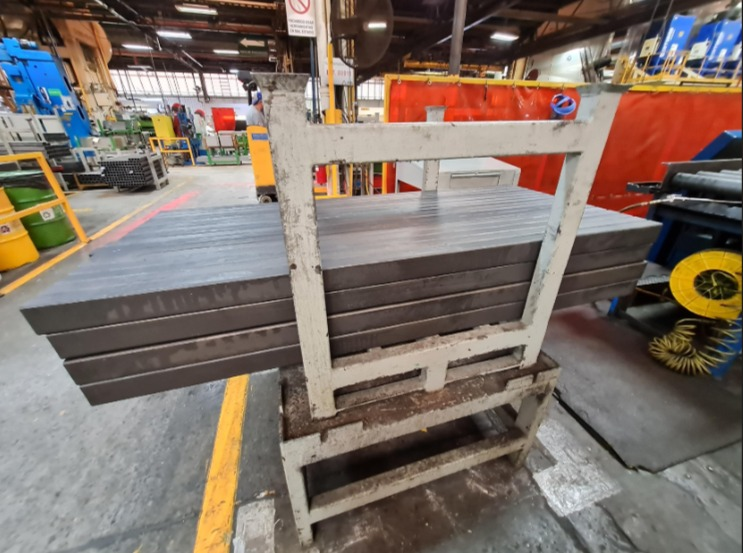

## Descripción de datos

Los datos que estaremos utilizando será un dataframe con información obtenida del sistema de gestión de datos empresarial SAP. Para poder acotar el proyecto y poder realizar un avance dentro del tiempo establecido se revisarón diferentes tipos de materias primas y optamos por desarrollar el proyecto con tubos de acero, tomando en consideración los siguientes puntos:


*   Cantidad de numeros de parte que salen de una materia prima
*   Volumen anual de materia prima

Nuestro set de datos esta conformado por las columnas que presento a continuación:
* **Materia prima:** Describe el código de la materia prima que utiliza John Deere para identificarlo en su sistema.
* **Grado de acero:** Se tienen diferentes diferentes grados de acero para las materias primas dependiendo de la aplicaicón, el departamento de ingeniería de producto son los que definen que grado de acero es requerido.
* **Espesor (in):** Se refiere al espesor del tubo, si planteamos un tubo redondo sería el resultado de diamtero exterior menos diametro interior. Se representa en pulgadas.
* **Base (in):** la medida de la base del tubo. Se representa en pulgadas.
* **Altura (in):** la medida de la base del tubo. Se representa en pulgadas.
* **Largo/Longitud (in):** es el largo de la materia prima. Se representa en pulgadas.
* **Volumen (in3):** Volumen de materia prima representado en pulgadas cubicas, es la multiplicación de base por altura por longitud.
* **Volumen (mm3):** Volumen de materia prima representado en milimetros cubicos, es la multiplicación de base por altura por longitud.
* **Peso (v*d) - kg:** Peso teórico en kilogramos multiplicando el volumen de materia prima por la densidad del acero.
* **Peso SAP (kg) - No confiable:** Peso registrado en SAP en kg. El líder de competencia de fabricación nos comentó que este dato no es muy confiable, es por eso que se tiene el peso teórico adicionalmente.
* **No. Parte manufacturada:** Representa el código de la piezas que salen de la materia prima, pueden ser diferentes numeros de parte dependiendo de la longitud.
* **Familia/Producto:** Indica la famila de productos a la que pertenece el numero de parte manufacturado.
* **Longitud parte manufactura (in):** Indica la longitud de la parte manufacturada que sale de la materia prima. Se representa en pulgadas.
* **Volumen (in3) - Parte manufacturada:** Volumen de parte manufacturada representado en pulgadas cubicas.
* **kg manufacturados:** Representa el peso de las piezas manufacturadas.
* **Requerimiento anual - P. manufacturada:** representa la demanda anual de las piezas manufacturadas en base a los pronósticos de inicio de año.
* **BOM (mat. Prima x pieza):** Indica la cantidad/porcentaje de la materia prima que representa una pieza manufacturada.
* **Piezas x mat. Prima:** Indica la cantidad máxima de piezas manufacturadas que se pueden cortar de una materia prima.
* **Longitud utilizada:** Indica la longitud de materia prima que se utiliza al cortar solamente la misma pieza manufacturada.
* **Aprovechamiento mat. Teórico:** Indica que tanto se aprovecha la materia prima al cortar la mayor cantidad de piezas manufacturadas del mismo código.
* **Materias primas a utilizar (Anual):** Indica la cantida dde materias primas a utilizar para satisfacer la demanda de las partes manufacturadas.
* **kg extendidos mat. Prima:** Indica la cantidad de kilogramos necesarios para satisfacer la demanda de partes manufacturadas de acuerdo a la cantidad de materias primas requeridas.
* **Costo extendido:** Indica el costo de material necesario para satisfacer la demanda.
* **kg extendidos manufacturado:** Indica la cantidad de kilogramos necesarios para satisfacer la demanda de partes manufacturadas.
* **Aprovechamiento mat. Teórico extendido:** Indica el procentaje de aprovechamiento de material basado en el peso de las materias primas vs el peso de las piezas manufacturadas con base a la demanda anual.


In [ ]:
#Para comenzar el análisis primeramente importamos algunas librerías requeridas para analizar nuestros datos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Aquí podemos observar los primeros 5 renglones de los datos que tenemos de cada materia prima, sus dimensiones y los números de parte que es posible manufacturar/cortar de ellas:
df = pd.read_csv("datos_avance1_proyecto_integrador.csv", encoding = 'latin-1')
df.head()

,Materia prima,Grado de acero,Espesor (in),Base (in),Altura (in),Largo/Longitud (in),Volumen (in3),Volumen (mm3),Peso (v*d) - kg,Peso SAP (kg) - No confiable,...,Requerimiento anual - P. manufacturada,BOM (mat. Prima x pieza),Piezas x mat. Prima,Longitud utilizada,Aprovechamiento mat. Teórico,Materias primas a utilizar (Anual),kg extendidos mat. Prima,Costo extendido,kg extendidos manufacturado,Aprovechamiento mat. Teórico extendido
0,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,0,0.066613,15,447.637795,0.999192,0,0.000000,0.000000,0.000000,0.000000
1,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,27,0.272813,3,366.660000,0.818438,9,1464.183000,1273.839210,1198.342274,0.818438
2,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,126,0.010985,91,447.834646,0.999631,2,325.374000,283.075380,225.175781,0.692052
3,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,0,0.008349,119,445.078740,0.993479,0,0.000000,0.000000,0.000000,0.000000
4,1082004050,A22H,0.375,5,5,337,1216.359375,19932558.93,154.477641,285.3,...,204,0.214538,4,289.196850,0.858151,51,7878.359672,6854.172915,6760.821375,0.858151


Para nuestro análisis inicial de optimización o aprovechamiento de nuestras materias primas obtuvimos los datos de los tubos cuadrados (PTRs) con espesor de 0.375 y 0.25 pulgadas.

In [ ]:
#Observemos primeramente el total de renglones y columnas que tenemos en nuestro conjunto de datos:
print("Nuestro conjunto de datos inicial cuenta con", df.shape[0], "renglones y con", df.shape[1],"columnas.")

Nuestro conjunto de datos inicial cuenta con 64 renglones y con 25 columnas.


Actualmente la materia prima se corta de manera estática, es decir, se corta un solo número de parte por materia prima según la cantidad requerida. La intención con nuestro proyecto es cortar diferentes números de parte en la misma materia prima para mejorar el Aprovechamiento del material (denominada en columna "Aprovechamiento mat. Teórico") o bien reducir el scrap.

La columna llamada "Aprovechamiento mat. Teórico" (Aprovechamiento de material teórico) es la variable que buscamos optimizar con nuestro modelo.
* La variable de salida va a indicarte qué número de parte y cuántos de cada uno debes cortar en esa materia prima para optimizar la materia prima (maximizar el "Aprovechamiento mat. Teórico").
* La variable de entrada es la demanda o requerimiento diario (números de parte requeridos por dia y cuántos de cada uno).

In [ ]:
#Validamos que nuestras columnas no contengan datos vacíos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Materia prima                           64 non-null     int64  
 1   Grado de acero                          64 non-null     object 
 2   Espesor (in)                            64 non-null     float64
 3   Base (in)                               64 non-null     int64  
 4   Altura (in)                             64 non-null     int64  
 5   Largo/Longitud (in)                     64 non-null     int64  
 6   Volumen (in3)                           64 non-null     float64
 7   Volumen (mm3)                           64 non-null     float64
 8   Peso (v*d) - kg                         64 non-null     float64
 9   Peso SAP (kg) - No confiable            64 non-null     float64
 10  No. Parte manufacturada                 64 non-null     object 


In [ ]:
df.isnull().any()

Materia prima                             False
Grado de acero                            False
Espesor (in)                              False
Base (in)                                 False
Altura (in)                               False
Largo/Longitud (in)                       False
Volumen (in3)                             False
Volumen (mm3)                             False
Peso (v*d) - kg                           False
Peso SAP (kg) - No confiable              False
No. Parte manufacturada                   False
Familia/Producto                          False
Longitud parte manufactura (in)           False
Volumen (in3) - Parte manufacturada       False
kg manufacturados                         False
Requerimiento anual - P. manufacturada    False
BOM (mat. Prima x pieza)                  False
Piezas x mat. Prima                       False
Longitud utilizada                        False
Aprovechamiento mat. Teórico              False
Materias primas a utilizar (Anual)      

Podemos observar que contamos con:
* 15 variables tipo flotantes - float64.
* 7 variables tipo enteros - int64.
* 3 variables tipo texto/strings - object.

In [ ]:
df.columns

Index(['Materia prima', 'Grado de acero', 'Espesor (in)', 'Base (in)',
       'Altura (in)', 'Largo/Longitud (in)', 'Volumen (in3)', 'Volumen (mm3)',
       'Peso (v*d) - kg', 'Peso SAP (kg) - No confiable',
       'No. Parte manufacturada', 'Familia/Producto',
       'Longitud parte manufactura (in)',
       'Volumen (in3) - Parte manufacturada', 'kg manufacturados',
       'Requerimiento anual - P. manufacturada', 'BOM (mat. Prima x pieza)',
       'Piezas x mat. Prima', 'Longitud utilizada',
       'Aprovechamiento mat. Teórico', 'Materias primas a utilizar (Anual)',
       'kg extendidos mat. Prima', 'Costo extendido',
       'kg extendidos manufacturado',
       'Aprovechamiento mat. Teórico extendido'],
      dtype='object')

In [ ]:
#Se cambian nombres de columnas a nombre más cortos y sin caracteres especiales para facilitar el manejo y análisis de las variables:
new_columns = ["mat_prima", "grado_acero", "espesor", "base", "altura", "longitud", "volumen_in3","volumen_mm3", "peso_kg_cal","peso_kg_sap","num_parte","familia", "longitud_man", "volumen_man", "kg_man", "req_anual_man", "mat_prima_x_pza", "pzas_x_mat_prima","longitud_utilizada", "aprov_material", "mat_primas_anual", "kg_ext_mat_prima", "costo_ext","kg_ext_man", "aprov_material_ext"]
df.columns = new_columns
df.head()

,mat_prima,grado_acero,espesor,base,altura,longitud,volumen_in3,volumen_mm3,peso_kg_cal,peso_kg_sap,...,req_anual_man,mat_prima_x_pza,pzas_x_mat_prima,longitud_utilizada,aprov_material,mat_primas_anual,kg_ext_mat_prima,costo_ext,kg_ext_man,aprov_material_ext
0,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,0,0.066613,15,447.637795,0.999192,0,0.000000,0.000000,0.000000,0.000000
1,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,27,0.272813,3,366.660000,0.818438,9,1464.183000,1273.839210,1198.342274,0.818438
2,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,126,0.010985,91,447.834646,0.999631,2,325.374000,283.075380,225.175781,0.692052
3,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,0,0.008349,119,445.078740,0.993479,0,0.000000,0.000000,0.000000,0.000000
4,1082004050,A22H,0.375,5,5,337,1216.359375,19932558.93,154.477641,285.3,...,204,0.214538,4,289.196850,0.858151,51,7878.359672,6854.172915,6760.821375,0.858151


In [ ]:
#A continuación revisamos algunos estadísticos básicos de las variables/columnas de nuestra base de datos:
df.describe()

,mat_prima,espesor,base,altura,longitud,volumen_in3,volumen_mm3,peso_kg_cal,peso_kg_sap,longitud_man,...,req_anual_man,mat_prima_x_pza,pzas_x_mat_prima,longitud_utilizada,aprov_material,mat_primas_anual,kg_ext_mat_prima,costo_ext,kg_ext_man,aprov_material_ext
count,6.400000e+01,64.000000,64.00000,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.081548e+09,0.283203,3.34375,3.625000,299.046875,674.972900,1.106082e+07,85.721558,161.961563,80.822249,...,83.718750,0.264763,12.890625,268.335800,0.900479,14.781250,1889.468886,1643.837931,1689.341006,0.261558
std,4.602553e+05,0.055645,1.55552,1.963961,76.760073,542.416724,8.888618e+06,68.886924,128.943361,79.979991,...,245.707948,0.246884,21.275306,74.862301,0.112922,39.432268,5894.721139,5128.407391,5256.358572,0.395747
min,1.081091e+09,0.250000,2.00000,2.000000,240.000000,225.000000,3.687089e+06,28.575000,49.100000,3.543307,...,0.000000,0.008349,1.000000,161.333333,0.517166,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.081091e+09,0.250000,2.00000,2.000000,240.000000,225.000000,3.687089e+06,28.575000,49.100000,15.884843,...,0.000000,0.066159,3.000000,224.881890,0.857899,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.081548e+09,0.250000,2.50000,2.500000,241.000000,286.437500,4.693870e+06,36.377562,87.050000,65.007874,...,0.000000,0.206161,4.500000,239.196614,0.937992,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.082004e+09,0.375000,5.00000,5.000000,344.500000,1217.769531,1.995567e+07,154.656730,287.150000,95.000000,...,17.250000,0.318784,15.000000,308.070866,0.988987,3.000000,173.008230,150.517160,134.857031,0.748360
max,1.082006e+09,0.375000,7.00000,7.000000,448.000000,1875.140625,3.072805e+07,238.142859,448.700000,338.000000,...,1508.000000,1.000000,119.000000,447.834646,1.000000,216.000000,33367.170380,29029.438230,29691.224060,0.986013


In [ ]:
#Se genera gráfico box plot para visualizar distribución de las variables y poder identificar "outliers" o datos atípicos:
#Se dividen variables por columnas similares para mejorar la visualización:
my_df1 = df[["longitud", "volumen_in3", "peso_kg_cal","peso_kg_sap", "volumen_man", "req_anual_man"]]
my_df2 = df[["longitud_man", "kg_man", "pzas_x_mat_prima","longitud_utilizada","mat_primas_anual"]]
my_df3 = df[[ "kg_ext_mat_prima", "costo_ext","kg_ext_man"]]
my_df4 = df[["espesor", "base", "altura"]]
my_df5 = df[[ "aprov_material", "aprov_material_ext", "mat_prima_x_pza"]]

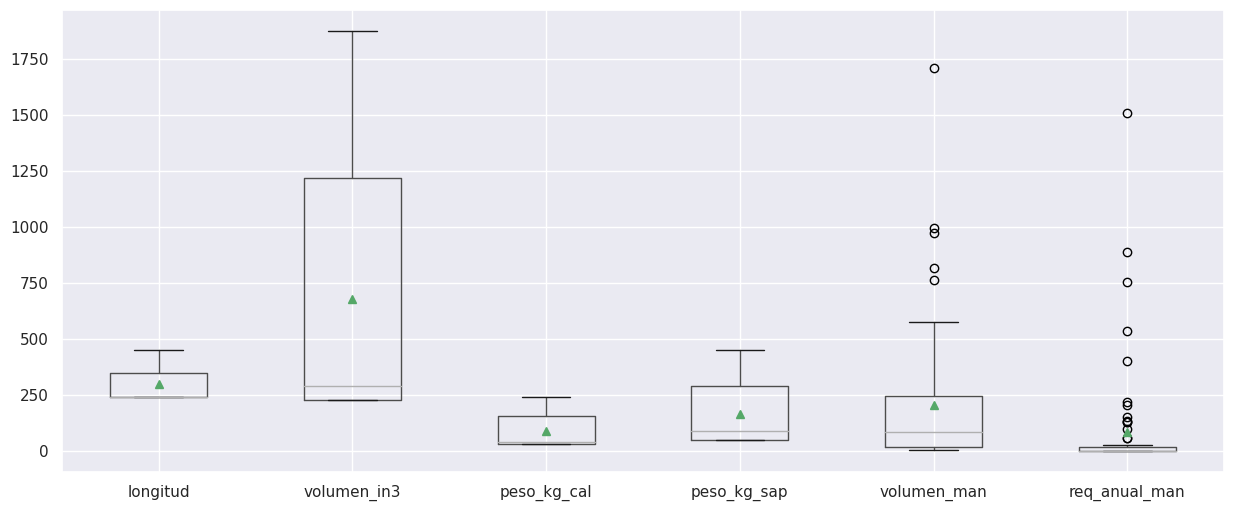

In [ ]:
pre_boxplot1 = my_df1.boxplot(figsize = (15,6), showmeans=True)
pre_boxplot1.plot()
plt.show()

* Se observa distribución de variables de longitud de materia prima, sus pesos y su volumen.
* Podría considerarse que el volumen de las piezas manufacturadas y el requerimiendo anual de las piezas manufacturadas tiene muchos datos atípicos, pero no tenemos una muestra demasiado grande (64 datos) para decidir eliminar esos renglones, más bien observamos que tenemos muchos números de parte que se están solicitando 0 al año los cuales no son de interés para nuestro análisis(req_anual_man).

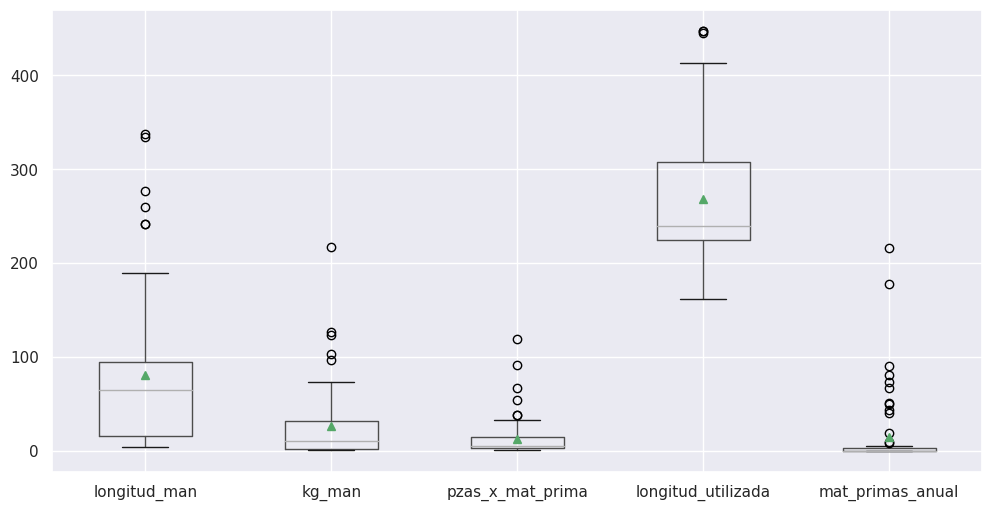

In [ ]:
pre_boxplot2 = my_df2.boxplot(figsize = (12,6), showmeans=True)
pre_boxplot2.plot()
plt.show()

* Se obseva el corportamiento de la longitud de las piezas manufacturadas (menor rango que va de 0 a 350, mientras que el de las materias primas se ve de 240 a 500 aprox. como se esperaba).
* La longitud utilizada sigue una distribución casi normal (constituye al corte actual estático de un solo número de parte por materia prima, sin buscar optimizar)

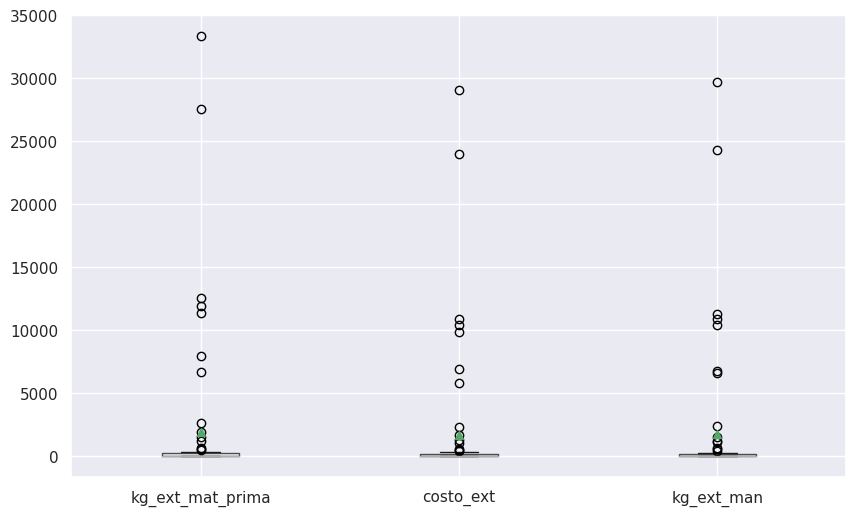

In [ ]:
pre_boxplot3 = my_df3.boxplot(figsize = (10,6), showmeans=True)
pre_boxplot3.plot()
plt.show()

* Aquí observamos el comportamiento de las variables "extendidas" que corresponden al análisis estático según el requerimiento anual de cortar estáticamente los números de parte en las materias primas. Por eso tienen rangos mayores a las demás variables.

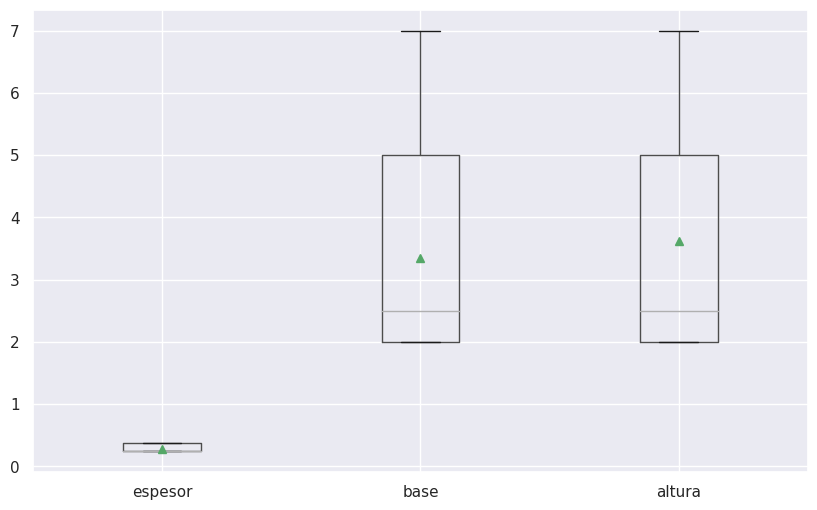

In [ ]:
pre_boxplot4 = my_df4.boxplot(figsize = (10,6), showmeans=True)
pre_boxplot4.plot()
plt.show()

* Aquí observamos las variables de las dimensiones de la materia prima de menores rangos.

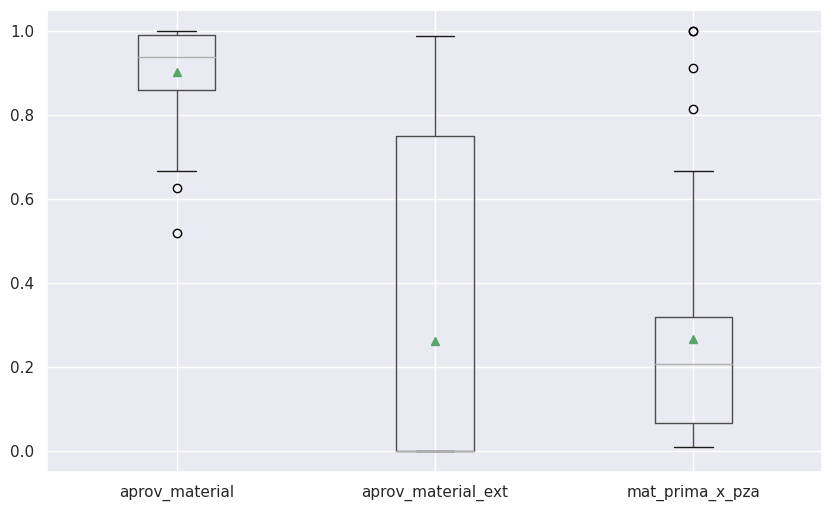

In [ ]:
pre_boxplot5 = my_df5.boxplot(figsize = (10,6), showmeans=True)
pre_boxplot5.plot()
plt.show()

* Además observamos las variables correspondientes a porcentajes, que nuestro objetvivo son maximizar. Por ejemplo, la variable "aprov_material" tiene valores mínimos de aprox. 50% y la mayoria de sus valores está arriba del 80%
* Al ver el valor anualizado (extendido) del aprovechamiento de la materia prima, vemos que la mayoría de los porcentajes son inferiores al 80%, lo que buscamos mejorar con nuestro modelo.

In [ ]:
#Aquí podemos comprobar que efectivamente solo tenemos datos de las materias primas de los espesores seleccionados para el análisis:
df.espesor.unique()

array([0.375, 0.25 ])

In [ ]:
#Aquí podemos observar cuántos datos o número de parte se cortan en total de cada espesor.
df.espesor.value_counts()

0.250    47
0.375    17
Name: espesor, dtype: int64

In [ ]:
#En la columna "req_anual_man" (Requerimiento anual manufacturado) podemos confirmar que si bien hay muchos números de parte que es posible cortar en esas materias primas,
#muchas de ellas no tienen demanda para el próximo año, por lo que probablemente corresponde a número de parte de máquinas anteriores que o cambiaron de modelo o ya no se fabrican:
df.req_anual_man.value_counts()

0       42
57       1
16       1
128      1
18       1
218      1
55       1
752      1
95       1
17       1
133      1
14       1
27       1
13       1
536      1
149      1
1        1
886      1
1508     1
402      1
204      1
126      1
3        1
Name: req_anual_man, dtype: int64

*Observamos que 42 de los 64 números de parte no tienen demanda para el próxima año (con valor de 0).

Vamos a enfocar la optimización en los números de parte que sí tienen demanda. Revisemos cuántos números de parte por materia prima tienen demandas diferentes a 0.

In [ ]:
#Creamos una copia de nuestro dataframe para eliminar estos registros sin perder los datos originales:
df1 = df.copy()
df1.head()

,mat_prima,grado_acero,espesor,base,altura,longitud,volumen_in3,volumen_mm3,peso_kg_cal,peso_kg_sap,...,req_anual_man,mat_prima_x_pza,pzas_x_mat_prima,longitud_utilizada,aprov_material,mat_primas_anual,kg_ext_mat_prima,costo_ext,kg_ext_man,aprov_material_ext
0,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,0,0.066613,15,447.637795,0.999192,0,0.000000,0.000000,0.000000,0.000000
1,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,27,0.272813,3,366.660000,0.818438,9,1464.183000,1273.839210,1198.342274,0.818438
2,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,126,0.010985,91,447.834646,0.999631,2,325.374000,283.075380,225.175781,0.692052
3,1082004047,A22H,0.375,4,4,448,1281.000000,20991828.98,162.687000,292.7,...,0,0.008349,119,445.078740,0.993479,0,0.000000,0.000000,0.000000,0.000000
4,1082004050,A22H,0.375,5,5,337,1216.359375,19932558.93,154.477641,285.3,...,204,0.214538,4,289.196850,0.858151,51,7878.359672,6854.172915,6760.821375,0.858151


In [ ]:
#Se eliminan renglones que tiene un requerimiento anual igual a 0:
df1.drop(df1[(df1["req_anual_man"]==0)].index, inplace=True)

In [ ]:
#Observemos el resultado:
df1

,mat_prima,grado_acero,espesor,base,altura,longitud,volumen_in3,volumen_mm3,peso_kg_cal,peso_kg_sap,...,req_anual_man,mat_prima_x_pza,pzas_x_mat_prima,longitud_utilizada,aprov_material,mat_primas_anual,kg_ext_mat_prima,costo_ext,kg_ext_man,aprov_material_ext
1,1082004047,A22H,0.375,4,4,448,1281.000000,2.099183e+07,162.687000,292.70,...,27,0.272813,3,366.660000,0.818438,9,1464.183000,1273.839210,1198.342274,0.818438
2,1082004047,A22H,0.375,4,4,448,1281.000000,2.099183e+07,162.687000,292.70,...,126,0.010985,91,447.834646,0.999631,2,325.374000,283.075380,225.175781,0.692052
4,1082004050,A22H,0.375,5,5,337,1216.359375,1.993256e+07,154.477641,285.30,...,204,0.214538,4,289.196850,0.858151,51,7878.359672,6854.172915,6760.821375,0.858151
5,1082004050,A22H,0.375,5,5,337,1216.359375,1.993256e+07,154.477641,285.30,...,402,0.181079,5,305.118110,0.905395,81,12512.688890,10886.039330,11245.007810,0.898688
6,1082004050,A22H,0.375,5,5,337,1216.359375,1.993256e+07,154.477641,285.30,...,1508,0.127456,7,300.669291,0.892194,216,33367.170380,29029.438230,29691.224060,0.889833
7,1082004050,A22H,0.375,5,5,337,1216.359375,1.993256e+07,154.477641,285.30,...,886,0.177317,5,298.779528,0.886586,178,27497.020030,23922.407430,24268.910530,0.882601
10,1082004050,A22H,0.375,5,5,337,1216.359375,1.993256e+07,154.477641,285.30,...,1,0.265544,3,268.464567,0.796631,1,154.477641,134.395547,41.020547,0.265544
16,1082004055,A22H,0.375,7,7,367,1875.140625,3.072805e+07,238.142859,448.70,...,149,0.305789,3,336.673228,0.917366,50,11907.142970,10359.214380,10850.383710,0.911250
25,1081091120,A22H,0.250,2,2,240,225.000000,3.687089e+06,28.575000,49.10,...,536,0.153846,6,221.538462,0.923077,90,2571.750000,2237.422500,2356.338462,0.916239
27,1081091120,A22H,0.250,2,2,240,225.000000,3.687089e+06,28.575000,49.10,...,13,0.026042,38,237.500000,0.989583,1,28.575000,24.860250,9.673828,0.338542


In [ ]:
#Revisemos cuántos números de parte quedaron por materia prima:
df1.mat_prima.value_counts()

1081091120    9
1082004050    5
1082004030    4
1082004047    2
1082004055    1
1082006001    1
Name: mat_prima, dtype: int64

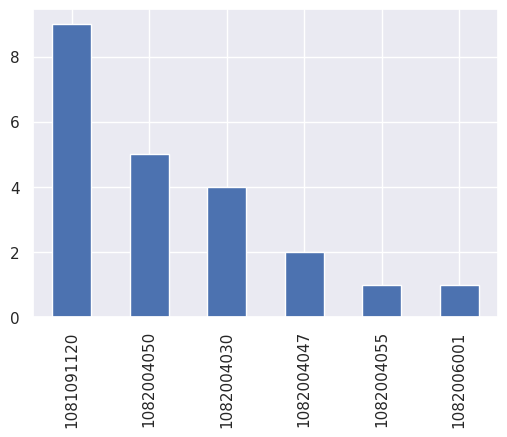

In [ ]:
#Observemoslo en un gráfico de barras:
plt.figure(figsize=(6,4))
df1["mat_prima"].value_counts().plot(kind= "bar")
plt.show()

Por lo que comenzaremos el análisis de optimización con las primeras 3 materias primas con mayor cantidad de números de parte que se corten en ellas:
* 1081091120 - con 9 números de parte.
* 1082004050 - con 5 números de parte.
* 1082004030 - con 4 números de parte.


## Correlación de datos

<ipython-input-44-08712b54cb94>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df1.corr(method= 'pearson', min_periods=1)


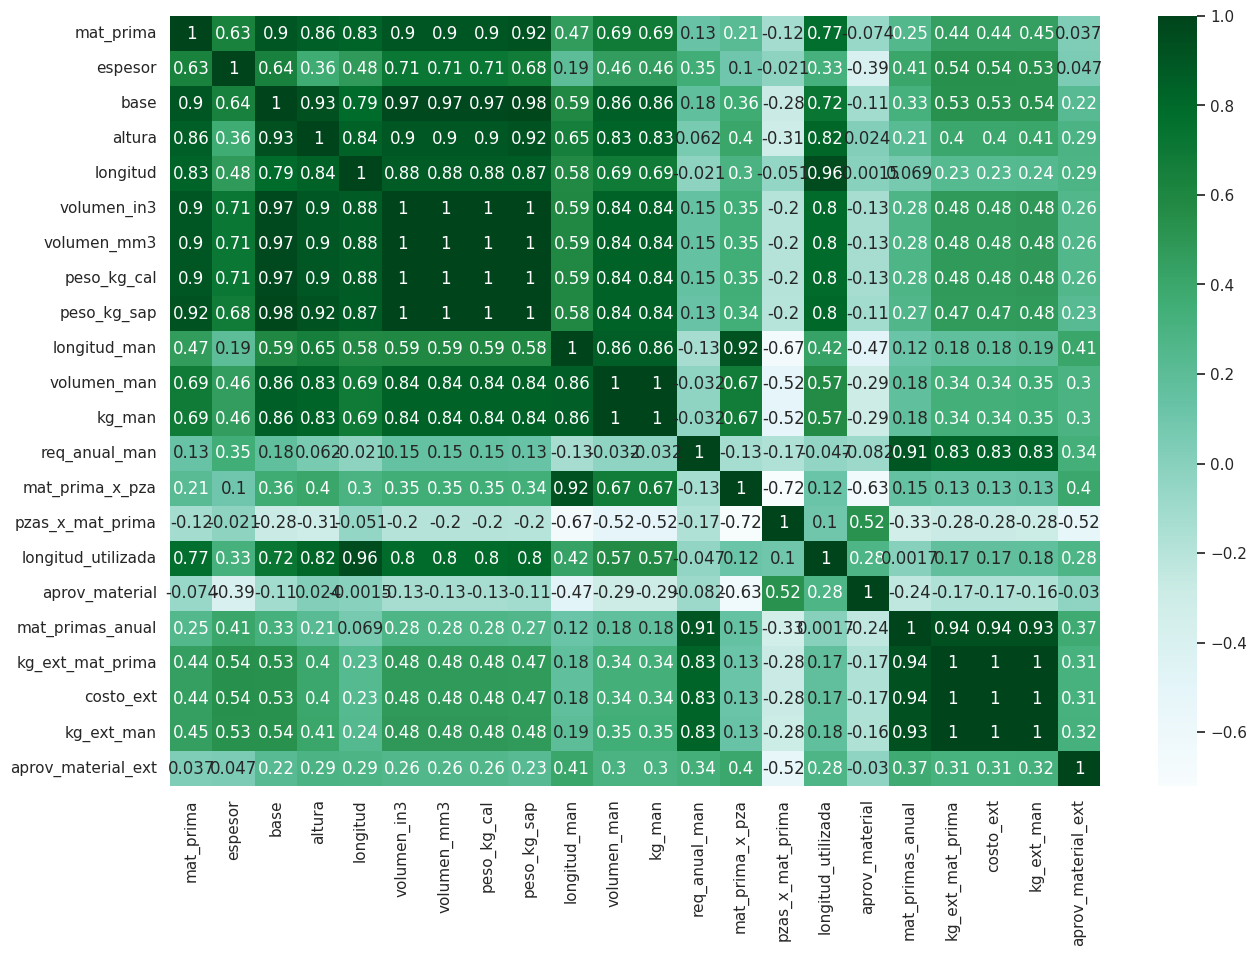

In [ ]:
#Se crea gráfico de correlación entre variables para entender mejor la relación entre ellas:
sns.set(rc={"figure.figsize":(15,10)})
corr1 = df1.corr(method= 'pearson', min_periods=1)
heat1 = sns.heatmap(corr1, cmap= "BuGn", annot = True)
plt.show()

* Podemos observar que las variables con color verde más oscuro son las que tienen mayor correlación positiva. Y las verdes más claras muestran las variables de mayor correlación negativa.
* Como era esperado se observa una gran correlación entre la variable mat_prima y sus dimensiones (espesor, base, altura, longitud, volumen_in3, volumen_mm3, peso_kg_cal, peso_kg_sap).
* Igualmente se observa una mayor correlación entre los variables de las piezas manufacturadas (que sus variables terminan en "_man" como longitud_man, volumen_man y kg_man) pues son dimensiones correspondientes a la partes manufacturadas.
* De la misma manera se tiene una alta correlación entre las variables "extendidas" que corresponden al análisis anual de cortar estáticamente los números de parte manufacturados en las materias primas (que terminan en _ext como kg_ext_mat_prima, costo_ext, kg_ext_man, aprov_material_ext y mat_primas_anual). Igual se observa una fuerte relación inversa de estas mismas variables con el aprov_material.

## Algoritmos de optimización

* Después de analizar nuestras variables de interés como se observó anteriormente. Empezamos a investigar algunos de los modelos de optimización que podemos apoyarnos para resover nuestra problemática. Comenzamos a explorar el denominado "**Knapsack Problem**", el cual se explica a continuación:

Es un tipo de problema de optimización combinatoria que implica seleccionar un subconjunto de elementos, cada uno con un peso y un valor específicos, para maximizar el valor total sin exceder una capacidad de peso dada.

El problema se formula comúnmente de la siguiente manera:

Dado un conjunto de elementos, cada uno con un peso wi y un valor
vi, y una mochila con una capacidad máxima W, el objetivo es encontrar la combinación más valiosa de elementos para incluir en la mochila sin exceder su capacidad de peso.

El problema de decisión se puede expresar de la siguiente manera: ¿Existe un subconjunto de elementos cuyo peso total sea menor o igual a W y cuyo valor total esté maximizado?

Ejemplo rapido de aplicacion del algoritmo:

Datos del problema:

Bloque A: Dimensiones = 3m X 2m X 1m, Precio = $100.

Bloque B: Dimensiones = 2m X 2m X 2m, Precio = $150.

Bloque C: Dimensiones = 1m X 1m X 3m, Precio = $80.

Capacidad máxima del volumen de la mochila: 15m3

Formulación del problema de la mochila:

v1 = 100, dim1 = (3,2,1)

v2 = 150, dim1 = (2,2,2)

v3 = 80, dim1 = (1,1,3)

Vmax = 5m3 (capacidad máxima del volumen de la mochila)


In [ ]:
def Mochila_0_1(dimensions, valores, capacidad_volumen):
    n = len(valores)
    matriz = [[0] * (capacidad_volumen + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for v in range(1, capacidad_volumen + 1):
            if sum(dimensions[i-1]) <= v:
                matriz[i][v] = max(valores[i-1] + matriz[i-1][v-sum(dimensions[i-1])], matriz[i-1][v])
            else:
                matriz[i][v] = matriz[i-1][v]

    return matriz[n][capacidad_volumen]

# Datos del problema
dimensions = [(3, 2, 1), (2, 2, 2), (1, 1, 3)]
valores = [100, 150, 80]
capacidad_volumen = 15

# Aplicar la función
resultado = Mochila_0_1(dimensions, valores, capacidad_volumen)

# Imprimir el resultado
print(resultado)

El valor de 250 significa que, utilizando el algoritmo de la mochila adaptado para dimensiones y volumen, se puede maximizar el valor total seleccionando bloques de materia prima de manera óptima.

Si se elige cortar y seleccionar bloques de manera óptima, siguiendo las restricciones de volumen y dimensiones, se podria obtener productos cuyo valor total es de $250.

*Nuestra intención es adaptar está lógica a nuestra problemática de nuestro Proyecto integrador.

Además del algoritmo de Knapsack, otras formas de encontrar la solución de un problema de optimización son:
1. Programacion Lineal
2. Algoritmos Geneticos
3. Algoritmos de Enjambre
4. Aprendizaje por Refuerzo
5. Redes Neuronales
* Los cuales exploraremos más a fondo más adelante.

## Bibliografía:

* Tutorialspoint. (2022, agosto 17). 0-1 Knapsack Problem. [En línea]. Recuperado el 28 de enero de 2024, de https://www.javatpoint.com/0-1-knapsack-problem

* Schmatz, S. (2022, agosto 25). Lecture 20: The Knapsack Problem. [En línea]. Recuperado el 28 de enero de 2024, de https://stevenschmatz.gitbooks.io/data-structures-and-algorithms/content/281/lecture_20.html

* GeeksforGeeks. (2022, agosto 15). 0-1 Knapsack Problem (DP). [En línea]. Recuperado el 28 de enero de 2024, de https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/